#**Chess Pieces Detection** ♟

### Download the data and the libraries

In [1]:
!pip -q install ultralytics roboflow opencv-python


from roboflow import Roboflow
rf = Roboflow(api_key="ftf5QBveFnG8Nr6CiwsB")
project = rf.workspace("fhv").project("chess-pieces-2-6l8qq")
version = project.version(5)
dataset = version.download("yolov11")

DATA_DIR  = dataset.location
DATA_YAML = f"{DATA_DIR}/data.yaml"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 115.3 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Chess-Pieces-2-5 in yolov11:: 100%|██████████| 13188/13188 [00:01<00:00, 7666.44it/s]


###Train

In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11x.pt")

run_name = "pieces_11x_640_v1"
project_path = "/content/drive/MyDrive/Courses/פרוייקט/colab/runs"

results = model.train(

    data=DATA_YAML,
    imgsz=640,
    epochs=200,
    device=0,
    workers=8,
    project=project_path,
    name=run_name,

    lr0=0.001,
    batch=32,

    optimizer="adamw",
    cache="ram",

    amp=True,
    patience=20,
    close_mosaic=10,
    plots=True,
    save_period=25
)

Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=ram, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Chess-Pieces-2-5/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11x.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=pieces_11x_640_v1, nbs=64, nms=False, opset=None, optimize=False, optimizer=adamw, overlap_mask=True, patience=20, perspe

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


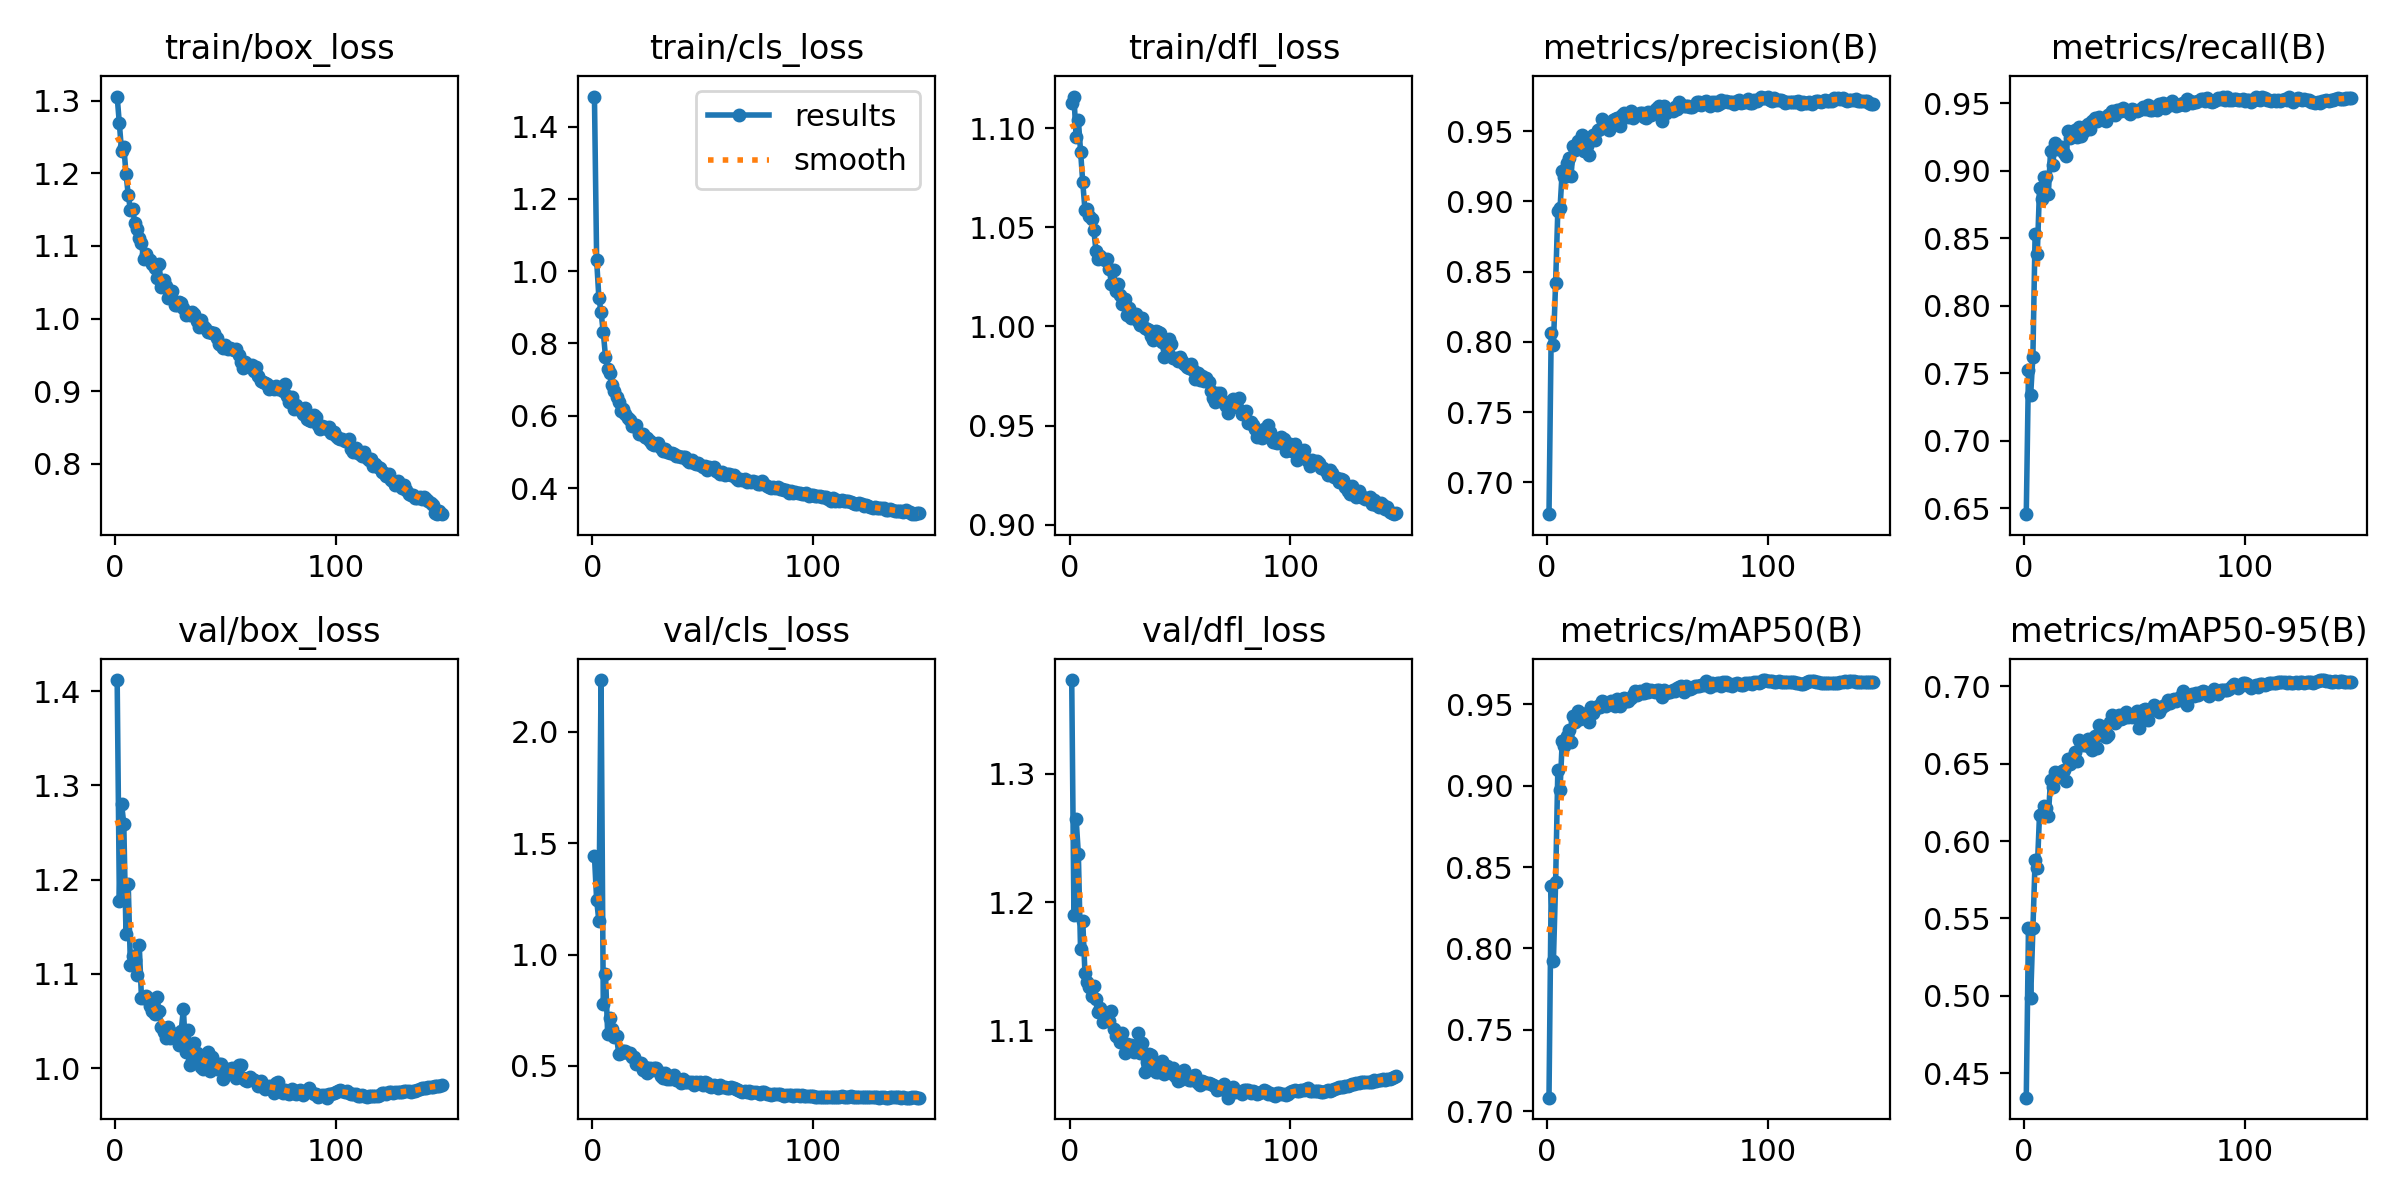

In [2]:
from ultralytics.utils.plotting import plot_results
from IPython.display import Image, display

# Path to your results file
results_file = "/content/drive/MyDrive/Courses/פרוייקט/colab/runs/pieces_11x_640_v1/results.csv"

# 1. Generate the plot
# This saves a new image 'results.png' in that same folder
plot_results(results_file)

# 2. Display the generated image
display(Image(filename="/content/drive/MyDrive/Courses/פרוייקט/colab/runs/pieces_11x_640_v1/results.png"))

###Evaluate on val set

In [ ]:
import os
from ultralytics import YOLO
run_dir = "/content/drive/MyDrive/Courses/פרוייקט/colab/runs/pieces_11x_640_v1"
best_ckpt = os.path.join(run_dir, "weights", "best.pt")
model = YOLO(best_ckpt)

# Validate on the validation split with plots (PR curve, F1 curve, confusion matrix)
metrics_val = model.val(
    data=DATA_YAML,
    imgsz=640,
    split="val",
    plots=True,   # saves PR_curve.png, F1_curve.png, confusion_matrix.png, etc.
    conf=0.001,   # low conf to build full PR curve
)

print("VAL mAP50-95:", metrics_val.box.map)        # overall
print("VAL mAP50:   ", metrics_val.box.map50)
print("VAL mAP75:   ", metrics_val.box.map75)
print("Per-class AP:", metrics_val.box.maps)       # list aligned to class order


Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
YOLO11x summary (fused): 190 layers, 56,840,884 parameters, 0 gradients, 194.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1401.4±595.7 MB/s, size: 42.3 KB)
val: Scanning /content/Chess-Pieces-2-5/valid/labels.cache... 910 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 910/910 1.5Mit/s 0.0s
val: /content/Chess-Pieces-2-5/valid/images/IMG_20200830_213649_jpg.rf.dd6493b472a9ff254a56093b96c96292.jpg: 1 duplicate labels removed
val: /content/Chess-Pieces-2-5/valid/images/IMG_20200830_213924_jpg.rf.3495435509cb36cf297a4621ea11a1e6.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 57/57 2.1it/s 26.6s
                   all        910      16125      0.972      0.952      0.964      0.704
          black-bishop        388       1292      0.975      0.958      0.967      0.658
            black-king      

Saving WhatsApp Image 2025-11-05 at 23.01.34_128c2056.jpg to WhatsApp Image 2025-11-05 at 23.01.34_128c2056 (2).jpg
WARNING ⚠️ 'line_thickness' is deprecated and will be removed in the future. Use 'line_width' instead.

0: 640x480 4 black-bishops, 4 black-kings, 5 black-knights, 8 black-pawns, 1 black-queen, 2 black-rooks, 2 white-bishops, 2 white-kings, 3 white-knights, 9 white-pawns, 1 white-queen, 2 white-rooks, 18.8ms
Speed: 2.8ms preprocess, 18.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /content/runs/detect/manual_pred


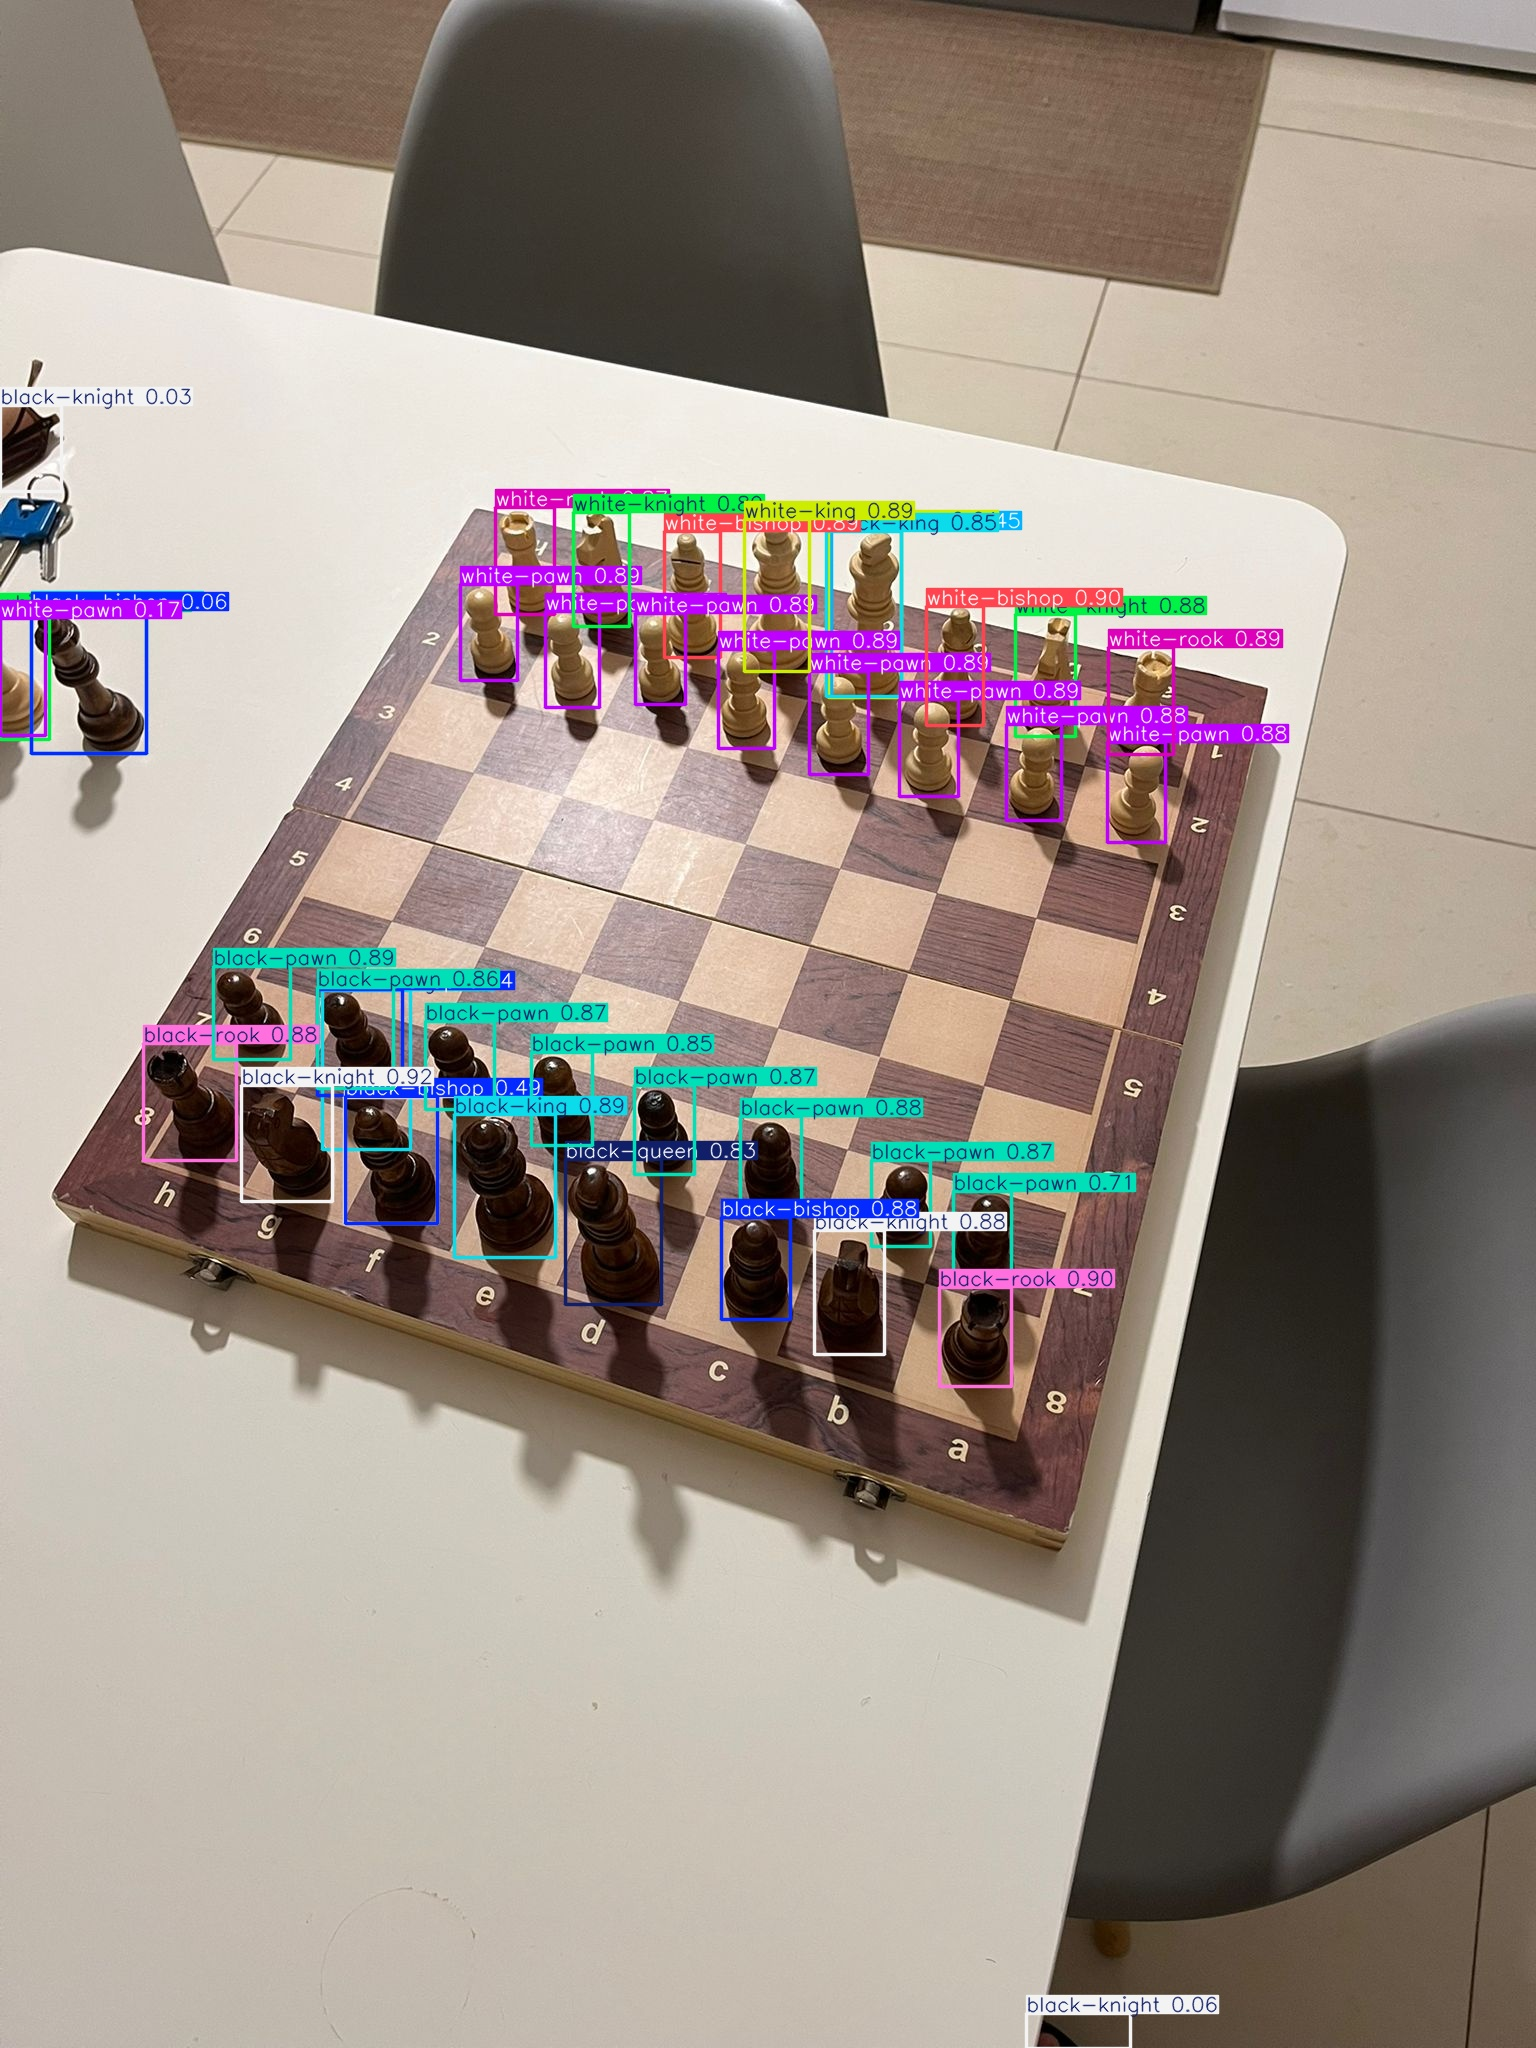

In [22]:

# 1) Upload an image from your computer
from google.colab import files
up = files.upload()  # choose one or more images
image_paths = list(up.keys())

# 2) Run prediction
from ultralytics import YOLO
import os

model = YOLO(best_ckpt)

pred = model.predict(
    source=image_paths,   # list of uploaded files
    imgsz=640,
    conf=0.01,            # adjust if you see too many/few boxes
    iou=0.001,
    max_det=64,
    save=True,            # saves annotated images
    project="/content/runs/detect",
    name="manual_pred",   # output dir: /content/runs/detect/manual_pred
    line_thickness=2,     # thicker lines for visibility
    save_conf=True
)

import glob
from IPython.display import Image, display

for p in glob.glob("/content/runs/detect/manual_pred/*.jpg"):
    display(Image(filename=p))

